In [1]:
import numpy as np 
import pandas as pd
import calendar
import math

# plots
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
filenames = ['properties/properati-AR-2016-03-01-properties-sell-six_months.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv', 
            'properties/properati-AR-2017-01-01-properties-sell.csv',
            'properties/properati-AR-2017-02-01-properties-sell.csv',
            'properties/properati-AR-2017-08-01-properties-sell-six_months.csv']

dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))
    
#Uno los dataFrame
metadata = pd.DataFrame()
for dataframe in dataframes:
    metadata = pd.concat([metadata, dataframe]).drop_duplicates().reset_index(drop=True)

In [3]:
#Filtramos las propiedades de Buenos Aires
data = metadata.loc[(metadata.state_name.str.contains('Buenos Aires')) | (metadata.state_name.str.contains\
                ('Capital Federal'))  | (metadata.state_name.str.contains\
                ('Bs.As') ),:]
data.shape
# 1.283.741 entries antes, ahora 242290

(242290, 27)

In [4]:
#Informacion del dataset
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.977450e+05,175574.000000,175574.000000,2.238850e+05,2.238850e+05,2.238850e+05,169994.000000,206584.000000,1.475720e+05,1.883390e+05,23312.000000,132384.000000,2.847200e+04
mean,3.492633e+06,-35.146553,-58.410186,3.109413e+05,3.877260e+06,2.316485e+05,249.915891,136.168759,1.958114e+03,4.254075e+03,18.746397,2.976515,3.844539e+03
std,3.914379e+05,1.536315,0.999009,7.957757e+05,5.746466e+06,3.420873e+05,1563.261275,2297.609111,3.900388e+03,1.857438e+04,137.064595,1.472099,8.417148e+04
min,3.427208e+06,-41.167596,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.275958e-02,1.000000,1.000000,1.000000e+00
25%,3.429651e+06,-34.724708,-58.567139,9.350000e+04,1.478683e+06,8.900000e+04,49.000000,45.000000,1.092593e+03,1.500000e+03,2.000000,2.000000,1.000000e+03
50%,3.430863e+06,-34.611605,-58.454166,1.580000e+05,2.443180e+06,1.450000e+05,89.000000,76.000000,1.739130e+03,2.043478e+03,3.000000,3.000000,1.850000e+03
75%,3.435379e+06,-34.562472,-58.379686,2.990000e+05,4.411125e+06,2.650000e+05,226.000000,155.000000,2.388664e+03,2.857143e+03,6.000000,4.000000,3.800000e+03
max,6.942539e+06,37.774929,3.379206,1.234568e+08,8.212711e+08,5.000000e+07,200000.000000,987897.000000,1.271027e+06,4.000000e+06,7167.000000,32.000000,1.000150e+07


In [5]:
data.info()
data.property_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242290 entries, 0 to 296476
Data columns (total 27 columns):
id                            242290 non-null object
created_on                    242290 non-null object
operation                     242290 non-null object
property_type                 242290 non-null object
place_name                    242238 non-null object
place_with_parent_names       242290 non-null object
country_name                  242290 non-null object
state_name                    242290 non-null object
geonames_id                   197745 non-null float64
lat-lon                       175574 non-null object
lat                           175574 non-null float64
lon                           175574 non-null float64
price                         223885 non-null float64
currency                      218619 non-null object
price_aprox_local_currency    223885 non-null float64
price_aprox_usd               223885 non-null float64
surface_total_in_m2           16999

apartment    137094
house         82560
PH            15012
store          7624
Name: property_type, dtype: int64

In [6]:
#Podemos ver rapidamente que hay propiedades con superficie 0 y precio 0 como minimo y casos excepcionales como maximo, lo cual no tiene sentido
# filtro de datos anómalos
data = \
data.loc[((data.surface_total_in_m2 > 0.0) & (data.surface_total_in_m2 <= 1000000.0)) & \
               ((data.surface_covered_in_m2 > 0.0) & (data.surface_covered_in_m2 <= 50000000.0)) &\
               (data.price_aprox_usd > 0.0)\
               , :]


data.shape

(136703, 27)

In [7]:
#Vista del dataframe
data.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,44ea5bafa3b885e5258e43007df2585779e5104f,2015-09-01,sell,house,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,"-34.6437012,-58.6515478",...,500.0,1400.000000,1400.000000,NaN,6.0,NaN,http://www.properati.com.ar/sw8m_venta_casa_ca...,"Venta - Chalet - LOTE 730 M2 - 17,32x43,30mts....",CASA EN VENTA,https://thumbs4.properati.com/1/Xu5ZT3SuzUdM8Y...
1,5a098d1d52954434cb083a3b4bdd68a794f01576,2015-09-01,sell,house,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,NaN,...,170.0,1058.823529,1058.823529,NaN,NaN,NaN,http://www.properati.com.ar/sw94_venta_casa_ca...,VENTA DE CASA 4 AMB - CASTELAR 170 m2 cub / 3...,CASA EN VENTA,https://thumbs4.properati.com/4/SMAEXX7hxbdJjt...
5,73891d7a4a76aed25befb4f736cbe478eeb51f58,2015-09-01,sell,house,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5366890239,-58.5669758524",...,100.0,357.142857,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/swa4_venta_departa...,CODIGO: 1092-rionegro y bvar ballester ubicado...,Chilavert. Casa 3 ambientes s/lote de 8.66x30,https://thumbs4.properati.com/3/siaMAf4dZvM68L...
9,bd013c64cde13788c1970fb96ee93ab5b77338c0,2015-09-01,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,"-34.6037232,-58.3815931",...,42.0,2888.888889,3095.238095,NaN,NaN,NaN,http://www.properati.com.ar/swau_venta_departa...,CODIGO: 1114-68 ubicado en: COSTA RICA AL 4400...,1 AMBIENTE A ESTRENAR PALERMO SOHO,https://thumbs4.properati.com/6/_032Pt2pJxv4nX...
12,6bd9a3d73cdc0a5ddde2ebb70ccdf58565feb82d,2015-09-01,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,...,500.0,2400.000000,2400.000000,NaN,4.0,NaN,http://www.properati.com.ar/swbx_venta_casa_no...,"CASA EN VENTA CON RENTA EN NORDELTA, BARRIO LO...",CASA EN VENTA,https://thumbs4.properati.com/5/CbBpIKPlMt4lTR...


In [8]:
#Cochera, transporte publico, BALCON o terraza
data.description.value_counts()

LAS FRESIAS GARDEN - VILLA DEL PARQUE Hermosa unidad de 3 ambientes con muy buena distribución y metraje en el emprendimiento mas prestigioso del barrio. UNIDADES DE 1,2,3 y 4 ambientes. IDEAL INVERSORES precios excelentes. Único por Naturaleza: Emplazado sobre Remedios de Escalada de San Martín esquina Condarco, en un entorno ideal para disfrutar en familia por su escencia de barrio y su impronta moderna, nace Fresias Garden, un condominio residencial, que contará con un total de 160 unidades de 2, 3 y 4 ambientes distribuidas en Planta Baja y módulos de 6 y 8 pisos, cada una de estas contará con amplios balcones y vistas al parque central de 3.700 m2. El proyecto contará con espacios parquizados y amenities de primer nivel que permitirá combinar el tiempo libre y en familia en un entorno seguro. Único por su estilo: Fresias Garden, ofrecerá al mejor estilo de un barrio cerrado una importante oferta de amenities, entre los que se destaca el área deportiva compuesta por la piscina clim

In [9]:
#Agrego columnas

In [10]:
data['cochera'] = 0
data.loc[data.description.str.contains('garaje|cochera|garage|garagge|estacionamiento', na=False), 'cochera'] = 1
data.cochera.value_counts()

0    105725
1     30978
Name: cochera, dtype: int64

In [11]:
data['transporte'] = 0
data.loc[data.description.str.contains('transporte|transporte publico', na=False), 'transporte'] = 1
data.transporte.value_counts()

0    131734
1      4969
Name: transporte, dtype: int64

In [12]:
data['balcon'] = 0
data.loc[data.description.str.contains('balcon|terraza', na=False), 'balcon'] = 1
data.balcon.value_counts()

0    105815
1     30888
Name: balcon, dtype: int64

In [13]:
data.property_type.value_counts()

apartment    78450
house        46329
PH            8277
store         3647
Name: property_type, dtype: int64

In [14]:
def tipoDePropiedadTest(x):
    if (x== 'house'): return 1
    if (x== 'PH'): return 2
    if (x== 'apartment'): return 3
    if (x== 'store'): return 4

data['tipo_propiedad'] = data['property_type'].apply(tipoDePropiedadTest)
data.tipo_propiedad.value_counts()

3    78450
1    46329
2     8277
4     3647
Name: tipo_propiedad, dtype: int64

## Set de datos a predecir


In [15]:
#subo el dataframe
test = pd.read_csv('properties/properati_dataset_testing_noprice.csv')
test.shape

(14166, 17)

In [16]:
# Depuración del set de test
#Completo los valores NaN con promedios para realizar la predicción
prom_surface_total_in_m2 = test['surface_total_in_m2'].mean()
prom_surface_covered_in_m2 = test['surface_covered_in_m2'].mean()
prom_lat = test['lat'].mean()
prom_lon = test['lon'].mean()

test_float = test
test_float['surface_total_in_m2'].fillna(prom_surface_total_in_m2, inplace=True)
test_float['surface_covered_in_m2'].fillna(prom_surface_covered_in_m2, inplace=True)
test_float['lat'].fillna(prom_lat, inplace=True)
test_float['lon'].fillna(prom_lon, inplace=True)


In [17]:
test_float['cochera'] = 0
test_float.loc[test_float.description.str.contains('garaje|cochera|garage|garagge|estacionamiento', na=False), 'cochera'] = 1
test_float.cochera.value_counts()

0    10896
1     3270
Name: cochera, dtype: int64

In [18]:
test_float['transporte'] = 0
test_float.loc[test_float.description.str.contains('transporte|transporte publico', na=False), 'transporte'] = 1
test_float.transporte.value_counts()

0    13411
1      755
Name: transporte, dtype: int64

In [19]:
test_float['balcon'] = 0
test_float.loc[test_float.description.str.contains('balcon|terraza', na=False), 'balcon'] = 1
test_float.balcon.value_counts()

0    11091
1     3075
Name: balcon, dtype: int64

In [20]:
test.property_type.value_counts()

departamento    9761
casa            3409
ph               996
Name: property_type, dtype: int64

In [21]:
def tipoDePropiedadTest(x):
    if (x== 'casa'): return 1
    if (x== 'ph'): return 2
    if (x== 'departamento'): return 3

test_float['tipo_propiedad'] = test_float['property_type'].apply(tipoDePropiedadTest)
test_float.tipo_propiedad.value_counts()

3    9761
1    3409
2     996
Name: tipo_propiedad, dtype: int64

## Uso pca prara incrementar los datos

In [22]:
data_float_pca = data.loc[:,['surface_total_in_m2', 'surface_covered_in_m2',\
                          'lat', 'lon']].dropna(axis= 0, how='any')

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_float_pca)
red = pca.transform(data_float_pca)
#print(pca.singular_values_)

In [24]:
red

array([[ 356.51446811,  338.97387116],
       [  84.34268931,  -27.52649457],
       [-156.34904183,  -53.1485943 ],
       ..., 
       [-107.65674935,  -36.59381519],
       [-157.74632507,  -55.98542138],
       [-155.76477006,  -56.25642124]])

In [25]:
d = {'col1': red[:,0], 'col2': red[:,1]}
red_data = pd.DataFrame(data=d)

data.reset_index(inplace=True)
data['PCA1'] = red_data['col1']
data['PCA2'] = red_data['col2']
data.tail()

,index,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,...,properati_url,description,title,image_thumbnail,cochera,transporte,balcon,tipo_propiedad,PCA1,PCA2
136698,296472,69746a0e825b24661327fb16a6e9c9b1f94447e2,2017-08-01,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,...,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,0,1,3,NaN,NaN
136699,296473,b2e3f9b2a03d94f938b78e8cb4319e01edc84900,2017-08-01,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,...,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,0,0,0,1,NaN,NaN
136700,296474,ef57596c881b0b3167aecbe263d88c5a2a280f61,2017-08-01,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,...,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0,0,0,3,NaN,NaN
136701,296475,450ffc16557f54567d15b16f553dd548ad6f66c2,2017-08-01,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,...,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,0,0,0,3,NaN,NaN
136702,296476,3f7e9d598124fdaa20721e5f60e38d94fc697d7e,2017-08-01,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,...,http://www.properati.com.ar/1cjaa_venta_depart...,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro,https://thumbs4.properati.com/8/mNEsnQWqB7joBF...,0,0,0,3,NaN,NaN


In [26]:
test_float_pca = test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2',\
                                    'lat', 'lon']]


In [27]:
red_test = pca.transform(test_float_pca)
red_test

array([[-157.91595764,  267.49256343],
       [-157.91595588,  267.49256521],
       [-147.60981275,  -48.28794596],
       ..., 
       [  28.64786125,   15.41630185],
       [-138.69281885,  -49.50746035],
       [ 174.60535763,   -9.59187853]])

In [28]:
d = {'col1': red_test[:,0], 'col2': red_test[:,1]}
red_test_data = pd.DataFrame(data=d)

#test_float.reset_index(inplace=True)
test_float['PCA1'] = red_test_data['col1']
test_float['PCA2'] = red_test_data['col2']
test_float.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,floor,rooms,expenses,description,cochera,transporte,balcon,tipo_propiedad,PCA1,PCA2
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,1,0,0,3,-157.915958,267.492563
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,-34.629923,...,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,0,0,0,3,-157.915956,267.492565
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,0,0,0,3,-147.609813,-48.287946
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,-34.629923,...,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,0,0,0,3,-162.700209,-55.307913
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,-34.629923,...,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,0,0,0,3,-149.184859,-45.044613


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136703 entries, 0 to 136702
Data columns (total 34 columns):
index                         136703 non-null int64
id                            136703 non-null object
created_on                    136703 non-null object
operation                     136703 non-null object
property_type                 136703 non-null object
place_name                    136674 non-null object
place_with_parent_names       136703 non-null object
country_name                  136703 non-null object
state_name                    136703 non-null object
geonames_id                   111052 non-null float64
lat-lon                       97102 non-null object
lat                           97102 non-null float64
lon                           97102 non-null float64
price                         136703 non-null float64
currency                      136703 non-null object
price_aprox_local_currency    136703 non-null float64
price_aprox_usd               136703 non

## Estimo parametros

In [39]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


prop = data.loc[:, ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',\
                          'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']].dropna(axis= 0, how='any')
target = 'price_aprox_usd'
IDcol = 'ID'
prop.shape

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(75627, 11)

In [40]:
def modelfit(alg, dprop, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    alg.fit(dprop[predictors], dprop['price_aprox_usd'])
        
    #Predict training set:
    dprop_predictions = alg.predict(dprop[predictors])
    
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dprop[predictors], dprop['price_aprox_usd'], cv=cv_folds, scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.r2_score(dprop['price_aprox_usd'].values, dprop_predictions))
   
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.7415
CV Score : Mean - 0.6553718 | Std - 0.05055889 | Min - 0.566097 | Max - 0.7325292


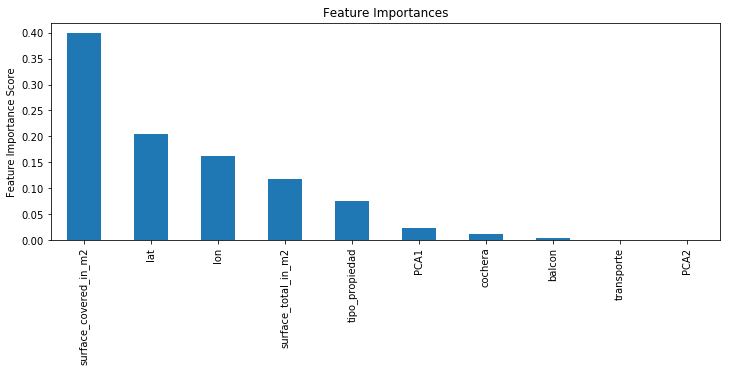

In [ ]:
#Choose all predictors except target & IDcols
predictors = ['surface_total_in_m2', 'surface_covered_in_m2', 'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']
gbm0 = GradientBoostingRegressor(random_state=10)
modelfit(gbm0, prop, predictors)

In [ ]:
predictors = ['surface_total_in_m2', 'surface_covered_in_m2', 'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']
param_test1 = {'n_estimators':list(range(1,500,1))}

gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,\
min_samples_leaf=50, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10),\
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)

                        
gsearch1.fit(prop[predictors], prop[target])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#Encontrar los parametros max_depth y min_samples_split
#Aca ya uso n_estimators=499
param_test2 = {'max_depth':list(range(2,16,2)), 'min_samples_split':list(range(200,1001,10))}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=499, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(prop[predictors], prop[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

## Hago la prediccion

In [41]:
data_float =  data.loc[:, ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',\
            'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']].dropna(axis= 0, how='any')

l = len(data_float)
limite = 70*l/100
print (l)
print (limite)


75627
52938.9


In [43]:
feature_cols = ['surface_total_in_m2', 'surface_covered_in_m2',\
            'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']
TRAIN = data_float[:60000]
TEST = data_float[60000:]

#Separo en set de entrenamiento y set de Test
X_train = TRAIN[feature_cols]
X_test = TEST[feature_cols]

y_train = TRAIN.price_aprox_usd
y_test = TEST.price_aprox_usd

In [44]:
# 'n_estimators': 591, 'max_depth': 12, 'min_samples_split': 240, 'min_samples_leaf': 19, 'max_features':2

from sklearn import ensemble
params = {'n_estimators': 591, 'max_depth': 12, 'min_samples_split': 240, 'min_samples_leaf':19 , 'max_features': 2,
          'learning_rate': 0.16}


clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

#Me fijo la precision
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Precisión Gradient Boosting train/test  0.958/0.692


In [45]:
#Hago la prediccion para Kaggle
test_float['price_aprox_usd_XGBFinal'] = clf.predict(test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2',\
                                            'lat', 'lon', 'cochera', 'transporte', 'balcon', 'tipo_propiedad', 'PCA1', 'PCA2']])

#Genero el csv con los nombres de columnas requeridos por Kaggle
test_float_reduced = test_float.loc[:,['id', 'price_aprox_usd_XGBFinal']]
test_float_reduced.columns=['id', 'price_usd']
test_float_reduced.to_csv('SubmitXGBoostingFINAL.csv', index=False)